In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
# Replace with the correct path to your file
file_path = '/content/drive/My Drive/bank_data_exitTest.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no   2343.0     yes   no  unknown   
1   56      admin.  married  secondary      no     45.0      no   no  unknown   
2   41  technician  married  secondary      no   1270.0     yes   no  unknown   
3   55    services  married  secondary      no   2476.0     yes   no  unknown   
4   54      admin.  married   tertiary      no    184.0      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome    y  
0  5.0   may    1042.0         1   -1.0         0  unknown  yes  
1  5.0   may    1467.0         1   -1.0         0  unknown  yes  
2  5.0   may    1389.0         1   -1.0         0  unknown  yes  
3  5.0   may     579.0         1   -1.0         0  unknown  yes  
4  5.0   may     673.0         2   -1.0         0  unknown  yes  


In [206]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [207]:
df.shape

(10861, 17)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [209]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [210]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,10846,10861,10852,10861,10861,10858,10850,10861,10861,10861
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
freq,2554,6169,5720,10691,6954,9505,6091,6497,8958,5572


In [211]:
df.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [212]:
# Replace missing values in categorical columns with the mode
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)


In [213]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,6
housing,0
loan,0
contact,0
day,1


In [214]:
# Replace missing values in numerical columns with the median
df['balance'].fillna(df['balance'].median(), inplace=True)
df['day'].fillna(df['day'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)
df['pdays'].fillna(df['pdays'].median(), inplace=True)

In [215]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [216]:
#display the rows with contact and default columns where value of default equal to 'yes'
df[(df['contact'] == 'cellular') & (df['default'] == 'yes')]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
483,41,blue-collar,single,secondary,yes,1085.0,yes,yes,cellular,7.0,jul,599.0,1,-1.0,0,unknown,yes
490,52,entrepreneur,married,tertiary,yes,-468.0,no,no,cellular,8.0,jul,534.0,1,-1.0,0,unknown,yes
491,27,technician,single,secondary,yes,0.0,no,yes,cellular,8.0,jul,732.0,1,-1.0,0,unknown,yes
502,26,blue-collar,single,secondary,yes,81.0,no,yes,cellular,8.0,jul,803.0,2,-1.0,0,unknown,yes
518,29,admin.,divorced,tertiary,yes,0.0,no,yes,cellular,9.0,jul,426.0,3,-1.0,0,unknown,yes
521,38,management,married,tertiary,yes,327.0,yes,yes,cellular,9.0,jul,556.0,5,-1.0,0,unknown,yes
587,36,services,divorced,secondary,yes,0.0,no,yes,cellular,15.0,jul,687.0,7,-1.0,0,unknown,yes
646,31,technician,married,secondary,yes,-367.0,yes,no,cellular,18.0,jul,474.0,2,-1.0,0,unknown,yes
647,30,services,single,secondary,yes,-366.0,yes,no,cellular,18.0,jul,516.0,1,-1.0,0,unknown,yes
729,41,blue-collar,married,secondary,yes,720.0,no,yes,cellular,24.0,jul,651.0,1,-1.0,0,unknown,yes


In [217]:
#print the count
df[(df['contact'] == 'cellular') & (df['default'] == 'yes')].shape


(38, 17)

In [218]:
#print the rows where value of loan equal to 'yes'
df[df['loan'] == 'yes']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5,42,management,single,tertiary,no,0.0,yes,yes,unknown,5.0,may,562.0,2,-1.0,0,unknown,yes
6,56,management,married,tertiary,no,830.0,yes,yes,unknown,6.0,may,1201.0,1,-1.0,0,unknown,yes
14,36,technician,married,secondary,no,368.0,yes,yes,unknown,6.0,may,1597.0,2,-1.0,0,unknown,yes
15,37,admin.,single,secondary,no,245.0,yes,yes,unknown,7.0,may,732.0,2,-1.0,0,unknown,yes
17,53,services,divorced,secondary,no,-291.0,yes,yes,unknown,7.0,may,591.0,1,-1.0,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10801,43,admin.,married,secondary,no,1807.0,yes,yes,unknown,30.0,may,711.0,1,-1.0,0,unknown,no
10828,40,technician,married,secondary,no,-28.0,yes,yes,unknown,30.0,may,289.0,2,-1.0,0,unknown,no
10843,46,services,married,secondary,no,1227.0,yes,yes,unknown,30.0,may,135.0,1,-1.0,0,unknown,no
10849,52,technician,married,secondary,no,1405.0,yes,yes,unknown,30.0,may,255.0,1,-1.0,0,unknown,no


In [219]:
#print the rows with housing equal to 'yes'
df[df['housing'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
5,42,management,single,tertiary,no,0.0,yes,yes,unknown,5.0,may,562.0,2,-1.0,0,unknown,yes
6,56,management,married,tertiary,no,830.0,yes,yes,unknown,6.0,may,1201.0,1,-1.0,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,37,technician,single,secondary,no,428.0,yes,no,unknown,30.0,may,107.0,1,-1.0,0,unknown,no
10856,45,housemaid,divorced,primary,no,413.0,yes,no,unknown,30.0,may,65.0,1,-1.0,0,unknown,no
10857,51,admin.,married,secondary,no,4178.0,yes,no,unknown,30.0,may,556.0,1,-1.0,0,unknown,no
10858,40,management,married,tertiary,no,2147.0,yes,no,unknown,30.0,may,115.0,1,-1.0,0,unknown,no


In [220]:
#print the count of y='yes'
df[df['loan'] == 'yes'].shape

(1353, 17)

In [221]:
#display the customers with previous count between 0greater than 0
df[(df['previous'] > 0) & (df['poutcome'] == 'success')]



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1152,56,technician,married,secondary,no,589.0,yes,no,unknown,23.0,oct,518.0,1,147.0,2,success,yes
1220,53,retired,married,tertiary,no,2269.0,no,no,cellular,17.0,nov,1091.0,2,150.0,1,success,yes
1252,45,management,divorced,secondary,no,644.0,yes,no,cellular,19.0,nov,418.0,1,168.0,1,success,yes
1268,46,unemployed,divorced,secondary,no,3354.0,yes,no,cellular,19.0,nov,522.0,1,174.0,1,success,yes
1283,40,management,married,tertiary,no,3352.0,yes,no,cellular,19.0,nov,639.0,2,27.0,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,32,blue-collar,married,secondary,no,136.0,no,no,cellular,16.0,nov,206.0,1,188.0,3,success,yes
5276,28,self-employed,single,tertiary,no,159.0,no,no,cellular,16.0,nov,449.0,2,33.0,4,success,yes
5277,68,retired,married,secondary,no,1146.0,no,no,cellular,16.0,nov,212.0,1,187.0,6,success,yes
5281,53,management,married,tertiary,no,583.0,no,no,cellular,17.0,nov,226.0,1,184.0,4,success,yes


In [222]:
#dividing the datFrame into Categorical cols and numerical cols
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [223]:
#display the categorical cols
categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [224]:
#display numerical cols
numerical_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

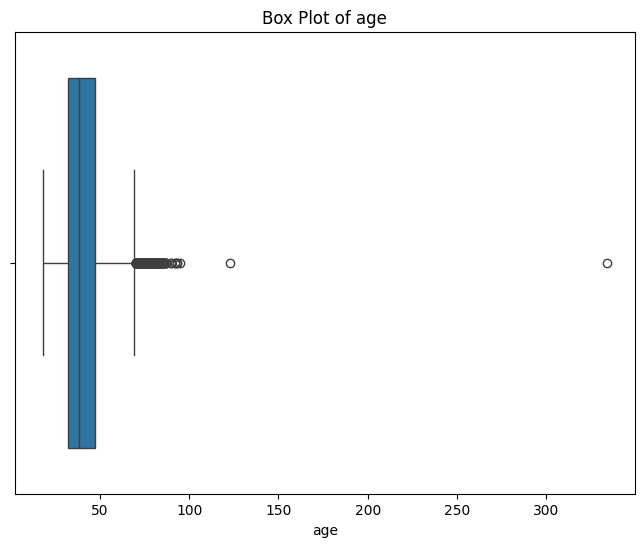

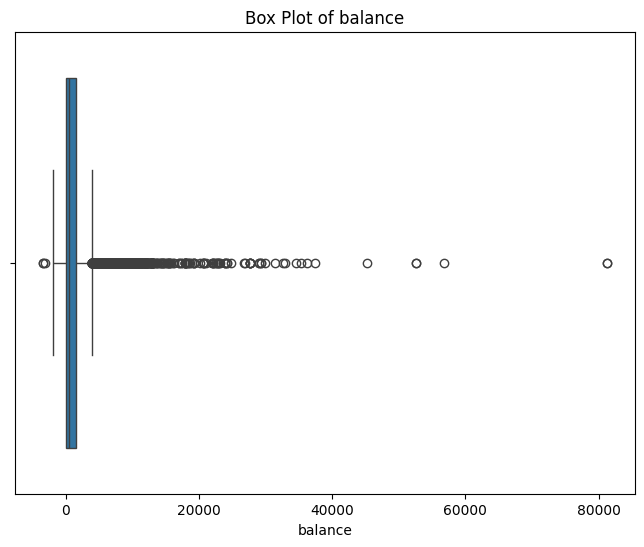

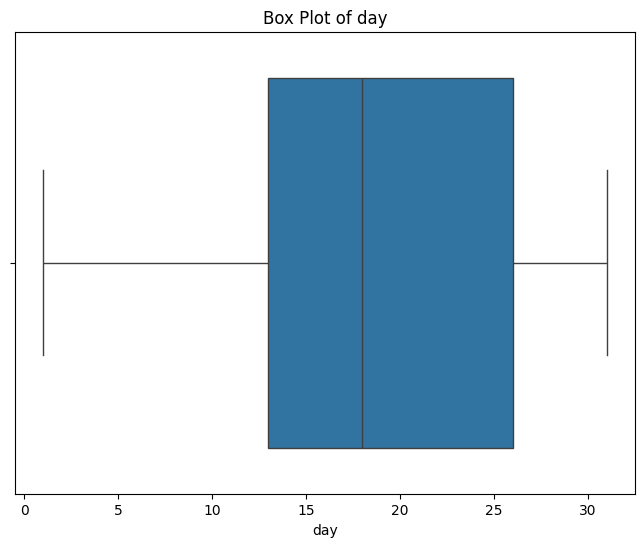

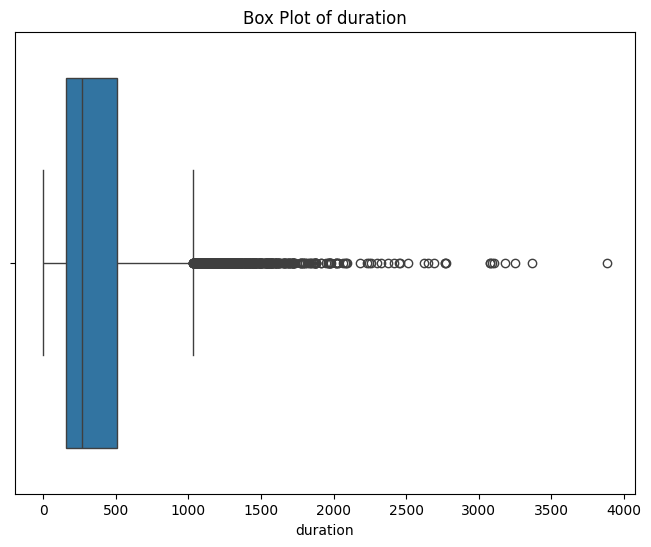

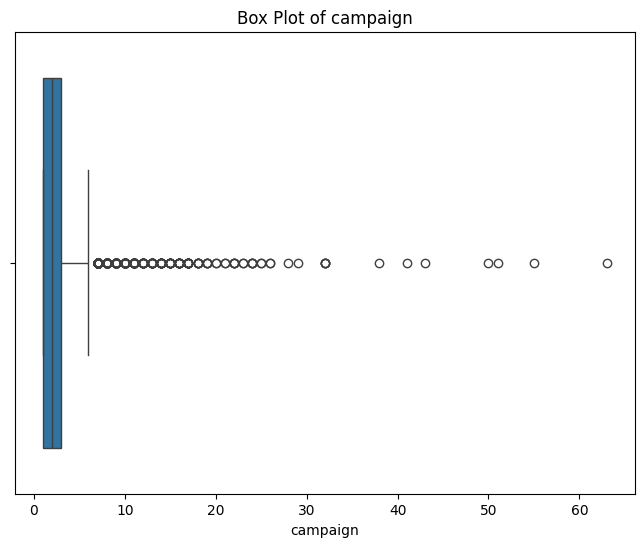

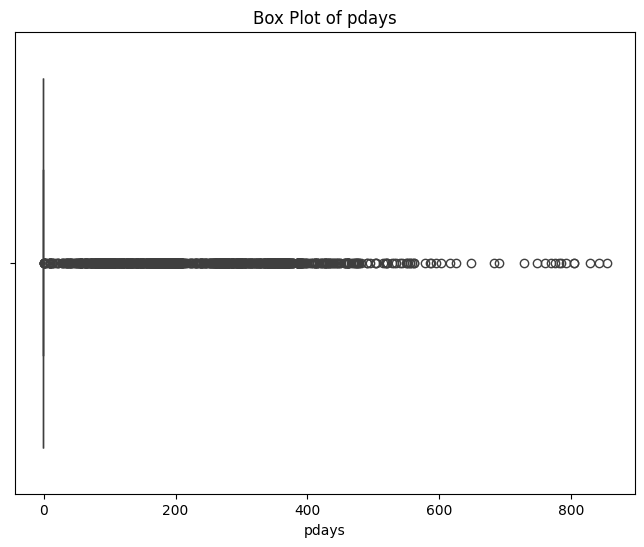

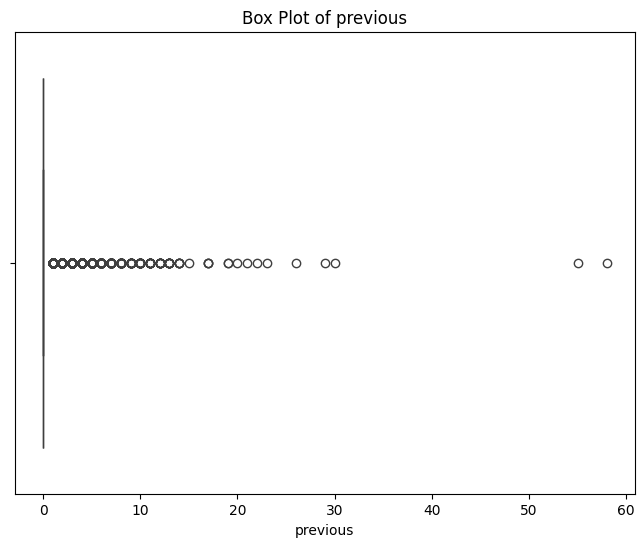

In [225]:
#checking outliers for numerical cols using box plot
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [226]:
#print te customers poutcome=''success' and y='yes' where age>=100
df[(df['poutcome'] == 'success') & (df['y'] == 'yes') & (df['age'] >= 95)]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [227]:
#treating outliers of age
#replace age above 100 with median
df.loc[df['age'] > 100, 'age'] = df['age'].median()


In [228]:
#label encoding encoding for categorical cols
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)
    print(le.transform(le.classes_))
    print()

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
[ 0  1  2  3  4  5  6  7  8  9 10 11]

['divorced' 'married' 'single']
[0 1 2]

['primary' 'secondary' 'tertiary' 'unknown']
[0 1 2 3]

['no' 'yes']
[0 1]

['no' 'yes']
[0 1]

['no' 'yes']
[0 1]

['cellular' 'telephone' 'unknown']
[0 1 2]

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
[ 0  1  2  3  4  5  6  7  8  9 10 11]

['failure' 'other' 'success' 'unknown']
[0 1 2 3]

['no' 'yes']
[0 1]



In [229]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343.0,1,0,2,5.0,8,1042.0,1,-1.0,0,3,1
1,56,0,1,1,0,45.0,0,0,2,5.0,8,1467.0,1,-1.0,0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5.0,8,1389.0,1,-1.0,0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5.0,8,579.0,1,-1.0,0,3,1


In [230]:
#scaling for numerical cols
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [231]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.612305,0,1,1,0,0.287909,1,0,2,-1.642699,8,1.900714,-0.54183,-0.37743,-0.303935,3,1
1,1.353804,0,1,1,0,-0.459029,0,0,2,-1.642699,8,3.132216,-0.54183,-0.37743,-0.303935,3,1
2,0.061295,9,1,1,0,-0.060857,1,0,2,-1.642699,8,2.906199,-0.54183,-0.37743,-0.303935,3,1
3,1.267636,7,1,1,0,0.331139,1,0,2,-1.642699,8,0.559102,-0.54183,-0.37743,-0.303935,3,1


##**EDA(Exploratory Data Analysis)**

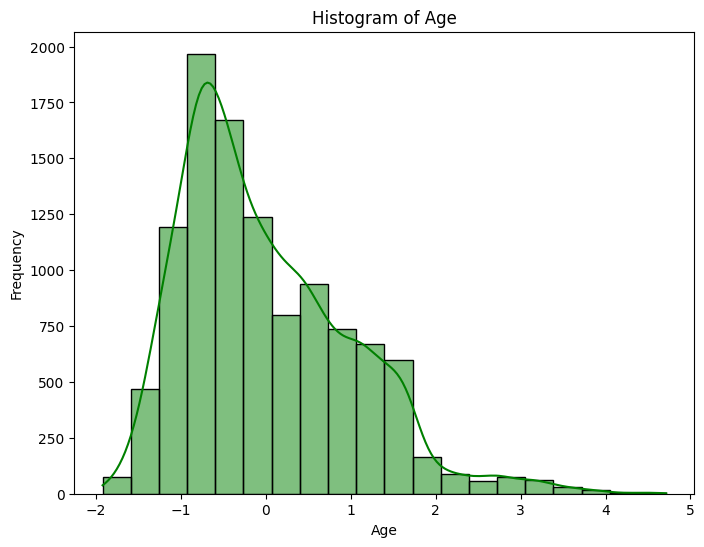

In [232]:
#plotting hist plot for age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='green')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


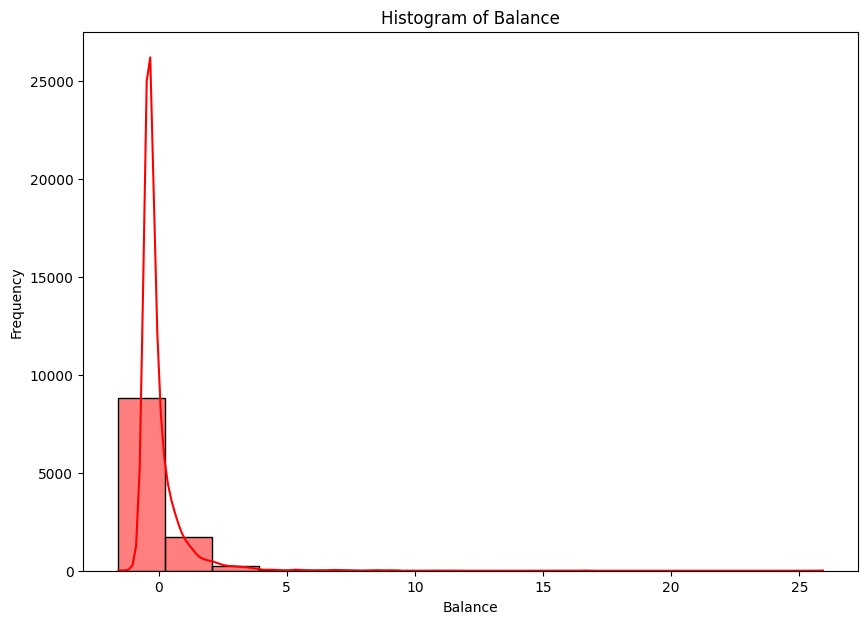

In [233]:
#plot a histplot for balance
plt.figure(figsize=(10, 7))
sns.histplot(df['balance'], bins=15, kde=True, color='red')
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

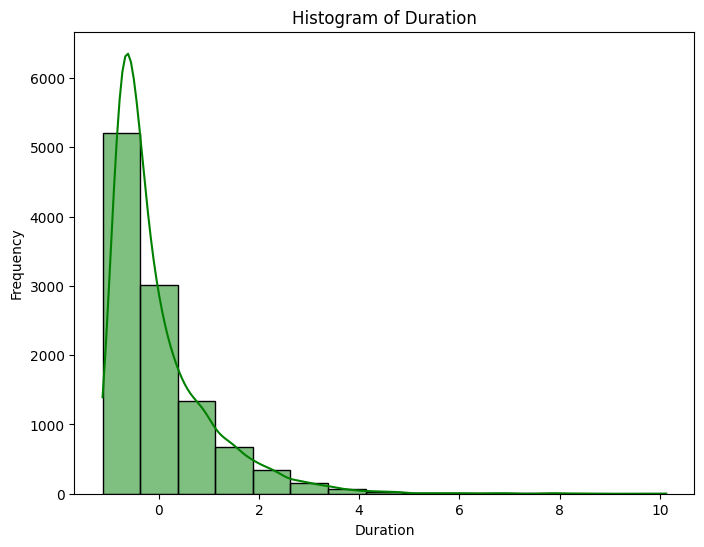

In [234]:
#plot a hist plot for duration
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=15, kde=True, color='green')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')

Text(0, 0.5, 'Count')

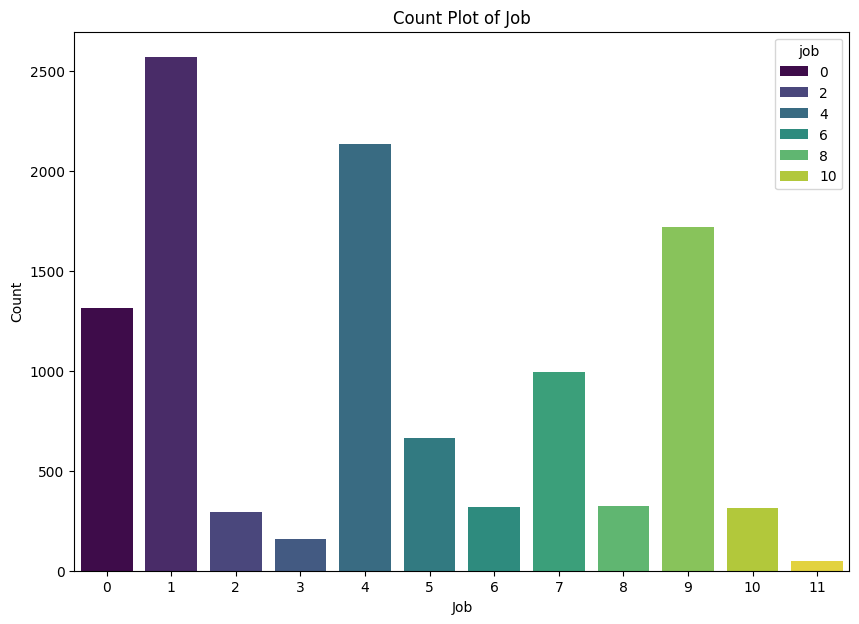

In [235]:
#plot count plot for job
plt.figure(figsize=(10, 7))
sns.countplot(x='job', data=df, palette='viridis', hue='job') # Changed 'Job' to 'job'
plt.title('Count Plot of Job')
plt.xlabel('Job')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

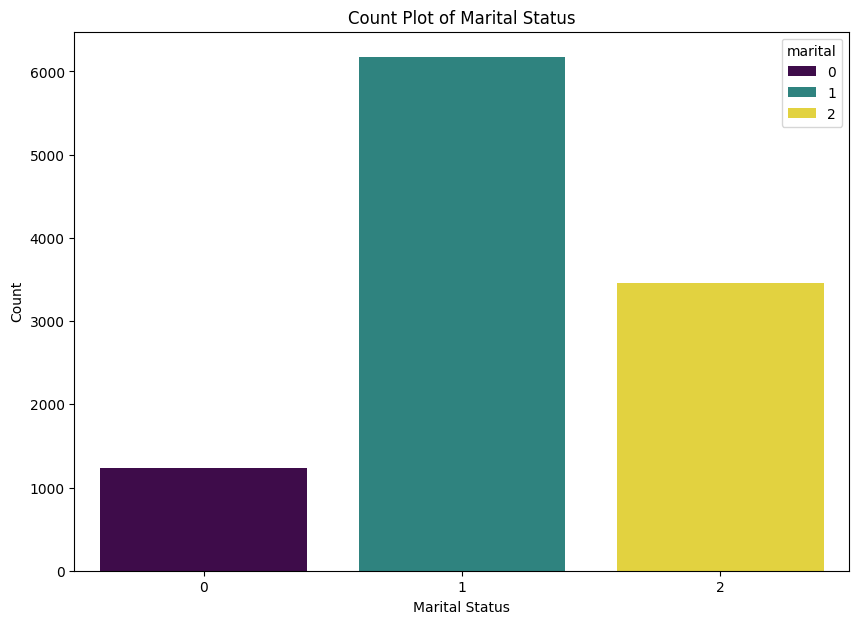

In [236]:
#plotting count plot for marital status
plt.figure(figsize=(10, 7))
sns.countplot(x='marital', data=df, palette='viridis', hue='marital')
plt.title('Count Plot of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

Text(0.5, 0, 'Education')

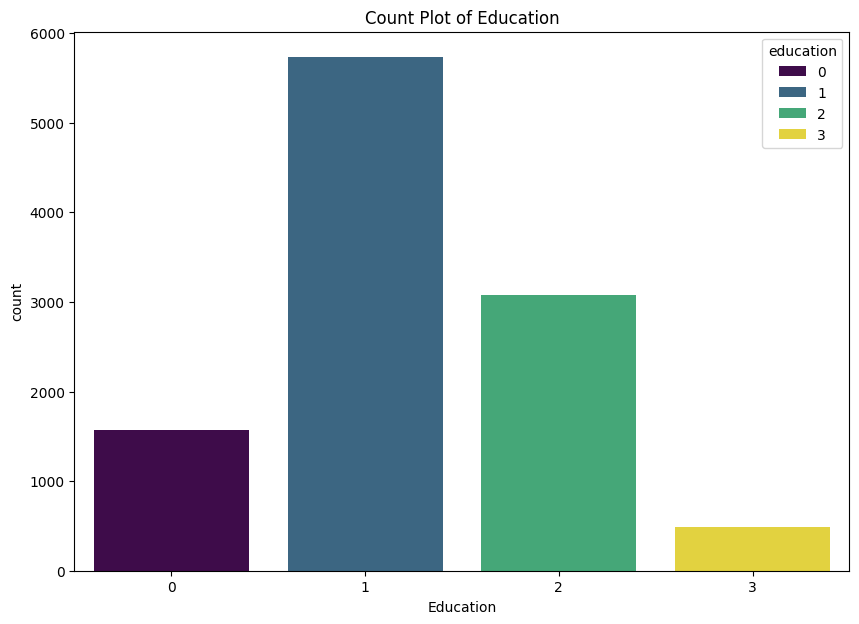

In [237]:
#plot count plot for education
plt.figure(figsize=(10, 7))
sns.countplot(x='education', data=df, palette='viridis', hue='education')
plt.title('Count Plot of Education')
plt.xlabel('Education')

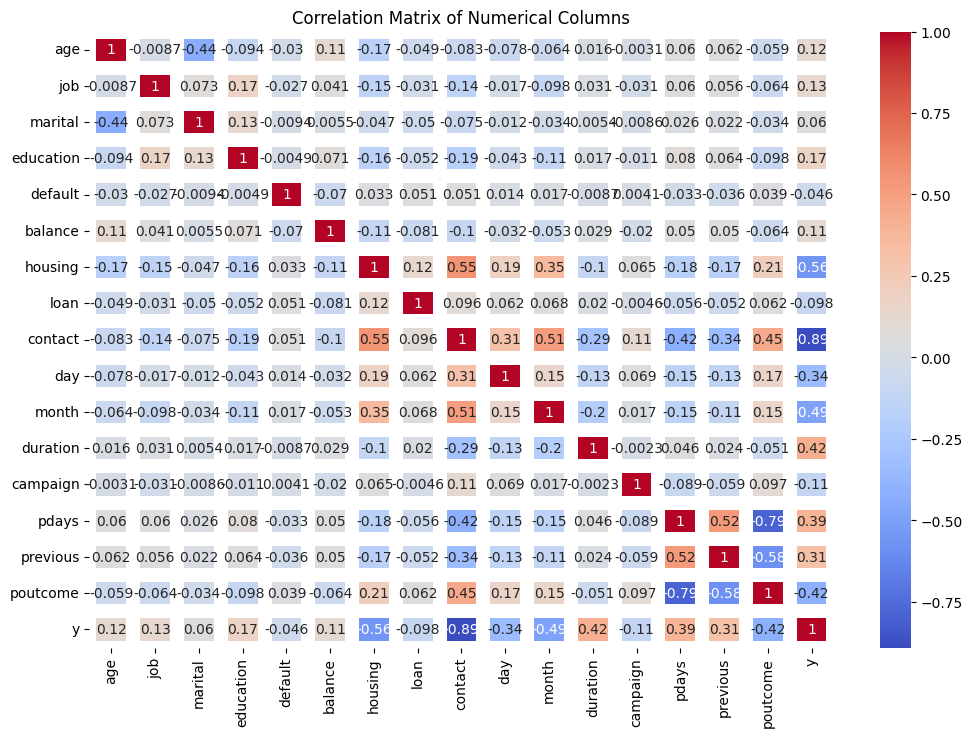

In [238]:
#plot corr matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=10)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Text(0, 0.5, 'y')

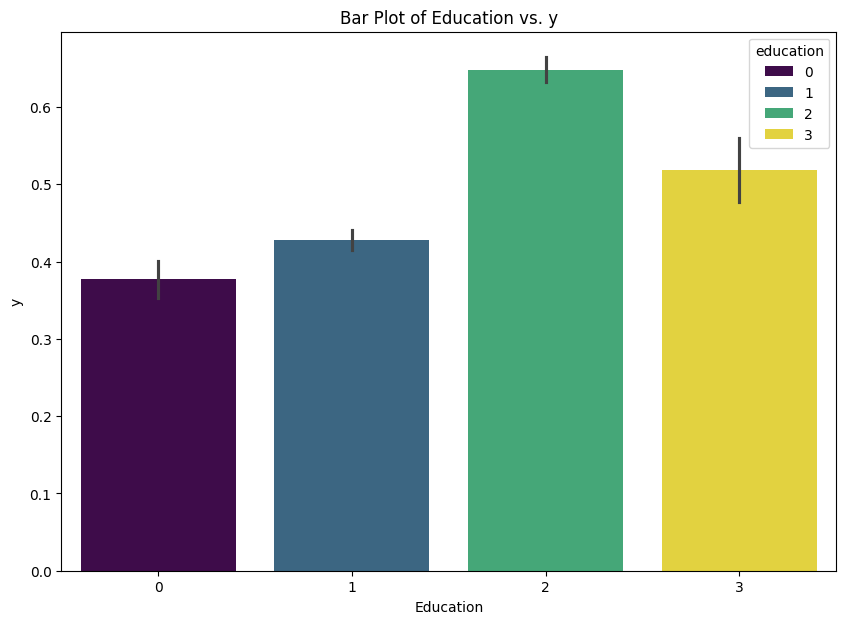

In [239]:
#plot bar plots for education and y
plt.figure(figsize=(10, 7))
sns.barplot(x='education', y='y', data=df, palette='viridis', hue='education') # Changed 'Education' to 'education'
plt.title('Bar Plot of Education vs. y')
plt.xlabel('Education')
plt.ylabel('y')

In [240]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'df' is your DataFrame and you want to calculate VIF for all numerical columns
X = df.select_dtypes(include=['float', 'int'])  # Select numerical columns

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

      feature        VIF
0         age   1.318599
1         job   2.758435
2     marital   5.716140
3   education   3.910933
4     default   1.026150
5     balance   1.039172
6     housing   4.256920
7        loan   1.176054
8     contact  11.309720
9         day   1.136891
10      month   8.788913
11   duration   1.285234
12   campaign   1.022037
13      pdays   2.221936
14   previous   1.494651
15   poutcome  21.454909
16          y   7.968362


<Axes: xlabel='y', ylabel='count'>

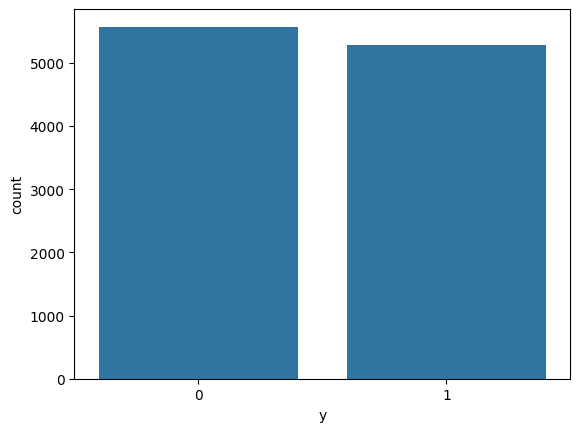

In [241]:
sns.countplot(x=df['y'])


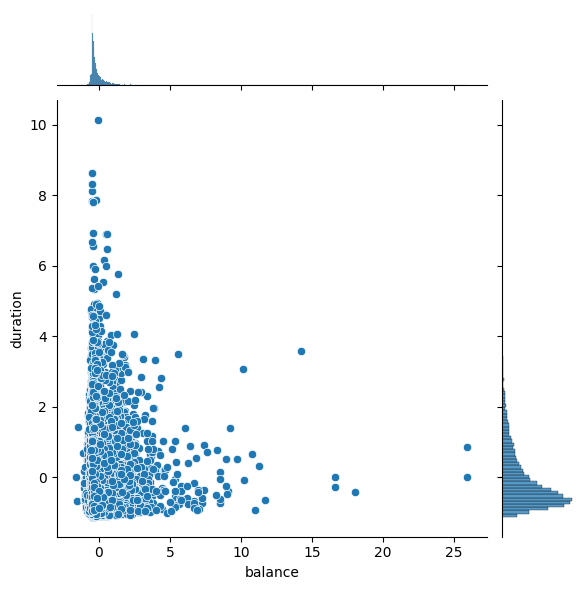

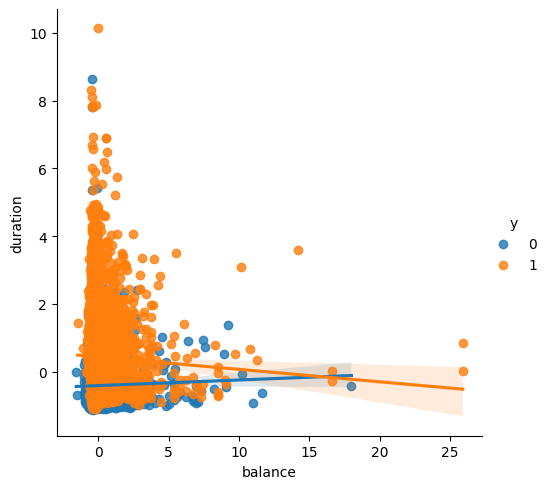

In [242]:
sns.jointplot(x='balance', y='duration', data=df, kind='scatter')
sns.lmplot(x='balance', y='duration', hue='y', data=df)


In [243]:
#value count of y
df['y'].value_counts()

,count
y,
0,5572
1,5289


#**Feature Selection**

In [244]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
X = df.drop('y', axis=1)
y = df['y']
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['job', 'education', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [245]:
#drop col day,month,housing from selected_features
selected_features = selected_features.drop('day')
selected_features = selected_features.drop('month')
selected_features = selected_features.drop('housing')


In [246]:
#print the selected_features
print(selected_features)

Index(['job', 'education', 'contact', 'duration', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


In [247]:
#split the data into x and y
X = df.drop('y', axis=1)
y = df['y']

**Downsampling the value of Y**

In [248]:
from sklearn.utils import resample

X = df.drop('y', axis=1)
y = df['y']

# Combine features and target variable into a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Separate majority and minority classes
df_majority = df_combined[df_combined['y'] == 0]
df_minority = df_combined[df_combined['y'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Do not replace
                                   n_samples=len(df_minority),  # Match the minority class size
                                   random_state=42)  # For reproducibility

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to ensure randomness
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X_balanced = df_balanced.drop('y', axis=1)
y_balanced = df_balanced['y']


In [249]:
#print the value count of y
y_balanced.value_counts()

,count
y,
1,5289
0,5289


In [250]:
#test train split for the dataFrame
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [251]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Increase max_iter and adjust regularization
model = LogisticRegression(max_iter=500, solver='saga', C=0.1)
model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9631845375057524
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1119
           1       0.98      0.95      0.96      1054

    accuracy                           0.96      2173
   macro avg       0.96      0.96      0.96      2173
weighted avg       0.96      0.96      0.96      2173

[[1095   24]
 [  56  998]]


In [252]:
#modelling using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Optional: Scale the data (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")





Accuracy: 0.97
Confusion Matrix:
[[1597   53]
 [  33 1576]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1650
           1       0.97      0.98      0.97      1609

    accuracy                           0.97      3259
   macro avg       0.97      0.97      0.97      3259
weighted avg       0.97      0.97      0.97      3259



In [253]:
#modelling using Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")




Accuracy: 0.98
Confusion Matrix:
[[1636   14]
 [  40 1569]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1650
           1       0.99      0.98      0.98      1609

    accuracy                           0.98      3259
   macro avg       0.98      0.98      0.98      3259
weighted avg       0.98      0.98      0.98      3259



In [258]:
#hyperparameter tuning for Random
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=2,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Print best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy on the dataset: {accuracy:.2f}")


Fitting 2 folds for each of 324 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
216 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.53
Accuracy on the dataset: 0.98


##**Random Forest is having the Highest Score is 98%**